In [61]:
import scipy.stats 
import statsmodels.stats.multitest
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
bif3_cluster_10 = pd.read_csv('/data/passala/Collaborator_Data/Maize_arabi_Jack_Collab/combining_pvalue/WTvsBIF3_cluster10.csv', index_col=0)
bif3_cluster_10 = bif3_cluster_10.rename(columns = {'p_val':'bif3_pval','avg_log2FC':'bif3_log2FC','p_val_adj':'bif3_pvaladj'})
fea3_cluster_9 = pd.read_csv('/data/passala/Collaborator_Data/Maize_arabi_Jack_Collab/combining_pvalue/WTvsFEA3_cluster_9.csv',index_col= 0)
fea3_cluster_9 = fea3_cluster_9.rename(columns = {'p_val':'fea3_pval','avg_log2FC':'fea3_log2FC','p_val_adj':'fea3_pvaladj'})
bif3_cluster_10

,bif3_pval,bif3_log2FC,pct.1,pct.2,bif3_pvaladj,Gene_of_Interest,up_or_down_in mutant
GRMZM2G008464,5.180000e-121,-1.344563,0.000,0.794,1.550000e-116,NaN,NaN
GRMZM2G058402,1.640000e-113,-1.920559,0.082,0.861,4.920000e-109,NaN,NaN
GRMZM2G093574,2.170000e-100,2.641430,0.991,0.765,6.510000e-96,NaN,NaN
GRMZM2G028218,2.280000e-96,-1.123953,0.004,0.668,6.850000e-92,NaN,NaN
GRMZM2G404608,1.630000e-95,-2.725494,0.622,0.987,4.880000e-91,NaN,NaN
...,...,...,...,...,...,...,...
GRMZM2G402027,1.000000e+00,0.000000,0.000,0.000,1.000000e+00,NaN,NaN
GRMZM2G100940,1.000000e+00,0.000000,0.000,0.000,1.000000e+00,NaN,NaN
GRMZM2G138920,1.000000e+00,0.000000,0.000,0.000,1.000000e+00,NaN,NaN
GRMZM5G845024,1.000000e+00,0.000000,0.000,0.000,1.000000e+00,NaN,NaN


In [64]:
filling_dict = {'fea3_pval':1,'fea3_log2FC':0,'fea3_pvaladj':1,'bif3_pval':1,'bif3_log2FC':0,'bif3_pvaladj':1}
merged_cluster9_cluster10 = fea3_cluster_9[['fea3_pval','fea3_log2FC','fea3_pvaladj']].merge(right =bif3_cluster_10[['bif3_pval','bif3_log2FC','bif3_pvaladj']], how = 'outer',left_index= True,right_index=True)
merged_cluster9_cluster10 = merged_cluster9_cluster10.fillna(value = filling_dict)

indexer = (merged_cluster9_cluster10['fea3_log2FC']*merged_cluster9_cluster10['bif3_log2FC'])<= 0
merged_cluster9_cluster10['fea3_pval'].loc[indexer] = 1
merged_cluster9_cluster10['bif3_pval'].loc[indexer] = 1

In [70]:
list_of_results_cluster910 = []
for gene in merged_cluster9_cluster10.iterrows():
    fea3_val = gene[1][0]
    bif3_val = gene[1][3]
    results = scipy.stats.combine_pvalues(pvalues = [fea3_val,bif3_val], method='fisher')
    list_of_results_cluster910.append(results[1])


In [71]:
len(list_of_results_cluster910)

30760

<AxesSubplot:ylabel='Count'>

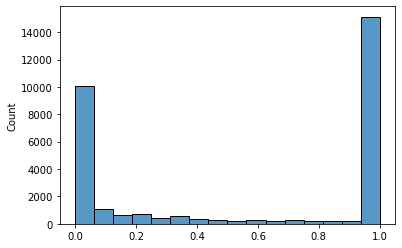

In [72]:
sns.histplot(list_of_results_cluster910)

In [73]:
merged_cluster9_cluster10['combined_pval'] = list_of_results_cluster910
merged_cluster9_cluster10

,fea3_pval,fea3_log2FC,fea3_pvaladj,bif3_pval,bif3_log2FC,bif3_pvaladj,combined_pval
AC148152.3_FG005,1.000000,0.000000,1.0,1.000000,0.000000,1.0,1.000000
AC148152.3_FG006,1.000000,0.000000,1.0,1.000000,0.000000,1.0,1.000000
AC148152.3_FG008,0.453455,-0.003704,1.0,0.134524,-0.007602,1.0,0.231612
AC148167.6_FG001,0.412770,-0.060152,1.0,0.000084,-0.232310,1.0,0.000389
AC149475.2_FG002,1.000000,-0.067138,1.0,1.000000,0.091819,1.0,1.000000
...,...,...,...,...,...,...,...
zma-MIR167g,1.000000,0.002664,1.0,1.000000,0.000000,1.0,1.000000
zma-MIR319a,1.000000,0.000000,1.0,1.000000,0.000000,1.0,1.000000
zma-MIR319c,1.000000,0.000000,1.0,1.000000,0.000000,1.0,1.000000
zma-MIR390a,1.000000,0.000000,1.0,1.000000,0.000000,1.0,1.000000


In [74]:
reject, corrected_pvals,alphasidak,alphacbof = statsmodels.stats.multitest.multipletests(pvals = merged_cluster9_cluster10['combined_pval'], alpha = .05, method = 'bonferroni',)

<AxesSubplot:ylabel='Count'>

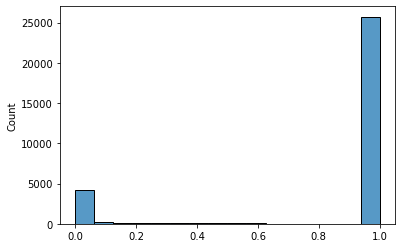

In [78]:
sns.histplot(corrected_pvals)

In [82]:
len(corrected_pvals)

30760

In [79]:
merged_cluster9_cluster10['bonf_adj_combined_pval'] = corrected_pvals
merged_cluster9_cluster10

,fea3_pval,fea3_log2FC,fea3_pvaladj,bif3_pval,bif3_log2FC,bif3_pvaladj,combined_pval,bonf_adj_combined_pval
AC148152.3_FG005,1.000000,0.000000,1.0,1.000000,0.000000,1.0,1.000000,1.0
AC148152.3_FG006,1.000000,0.000000,1.0,1.000000,0.000000,1.0,1.000000,1.0
AC148152.3_FG008,0.453455,-0.003704,1.0,0.134524,-0.007602,1.0,0.231612,1.0
AC148167.6_FG001,0.412770,-0.060152,1.0,0.000084,-0.232310,1.0,0.000389,1.0
AC149475.2_FG002,1.000000,-0.067138,1.0,1.000000,0.091819,1.0,1.000000,1.0
...,...,...,...,...,...,...,...,...
zma-MIR167g,1.000000,0.002664,1.0,1.000000,0.000000,1.0,1.000000,1.0
zma-MIR319a,1.000000,0.000000,1.0,1.000000,0.000000,1.0,1.000000,1.0
zma-MIR319c,1.000000,0.000000,1.0,1.000000,0.000000,1.0,1.000000,1.0
zma-MIR390a,1.000000,0.000000,1.0,1.000000,0.000000,1.0,1.000000,1.0


In [83]:
merged_cluster9_cluster10.loc['GRMZM2G051842']

fea3_pval                 5.600000e-06
fea3_log2FC               2.723826e-01
fea3_pvaladj              1.686821e-01
bif3_pval                 7.830000e-13
bif3_log2FC               5.370626e-01
bif3_pvaladj              2.350000e-08
combined_pval             1.796382e-16
bonf_adj_combined_pval    5.525671e-12
Name: GRMZM2G051842, dtype: float64

In [84]:
merged_cluster9_cluster10.loc['GRMZM2G171400']

fea3_pval                 2.830000e-22
fea3_log2FC               2.454891e-01
fea3_pvaladj              8.510000e-18
bif3_pval                 7.800000e-05
bif3_log2FC               1.583689e-01
bif3_pvaladj              1.000000e+00
combined_pval             1.326104e-24
bonf_adj_combined_pval    4.079097e-20
Name: GRMZM2G171400, dtype: float64

In [87]:
bif3_cluster_2_0 = pd.read_csv('/data/passala/Collaborator_Data/Maize_arabi_Jack_Collab/combining_pvalue/WTvsBif3_cluster2_0.csv', index_col=0)
bif3_cluster_2_0 = bif3_cluster_2_0.rename(columns = {'p_val':'bif3_pval','avg_log2FC':'bif3_log2FC','p_val_adj':'bif3_pvaladj'})
fea3_cluster_1 = pd.read_csv('/data/passala/Collaborator_Data/Maize_arabi_Jack_Collab/combining_pvalue/WTvsFEA3_cluster_1.csv',index_col= 0)
fea3_cluster_1 = fea3_cluster_1.rename(columns = {'p_val':'fea3_pval','avg_log2FC':'fea3_log2FC','p_val_adj':'fea3_pvaladj'})
bif3_cluster_2_0

,bif3_pval,bif3_log2FC,pct.1,pct.2,bif3_pvaladj,Gene_of_Interest,up_or_down_in mutant
GRMZM2G058402,7.540000e-153,-2.304061,0.071,0.958,2.260000e-148,NaN,NaN
GRMZM2G008464,5.230000e-139,-1.403817,0.000,0.850,1.570000e-134,NaN,NaN
GRMZM2G410812,1.890000e-137,-2.094478,0.073,0.904,5.660000e-133,NaN,NaN
GRMZM2G127521,4.520000e-135,-1.554779,0.000,0.832,1.360000e-130,NaN,NaN
GRMZM2G093574,1.240000e-131,2.377669,1.000,0.925,3.730000e-127,NaN,NaN
...,...,...,...,...,...,...,...
GRMZM2G100940,1.000000e+00,0.000000,0.000,0.000,1.000000e+00,NaN,NaN
GRMZM2G138920,1.000000e+00,0.000000,0.000,0.000,1.000000e+00,NaN,NaN
GRMZM5G845024,1.000000e+00,0.000000,0.000,0.000,1.000000e+00,NaN,NaN
GRMZM5G874448,1.000000e+00,0.000000,0.000,0.000,1.000000e+00,NaN,NaN


In [89]:
filling_dict = {'fea3_pval':1,'fea3_log2FC':0,'fea3_pvaladj':1,'bif3_pval':1,'bif3_log2FC':0,'bif3_pvaladj':1}
merged_cluster1_cluster2_0 = fea3_cluster_1[['fea3_pval','fea3_log2FC','fea3_pvaladj']].merge(right =bif3_cluster_2_0[['bif3_pval','bif3_log2FC','bif3_pvaladj']], how = 'outer',left_index= True,right_index=True)
merged_cluster1_cluster2_0 = merged_cluster1_cluster2_0.fillna(value = filling_dict)

indexer = (merged_cluster1_cluster2_0['fea3_log2FC']*merged_cluster1_cluster2_0['bif3_log2FC'])<= 0
merged_cluster1_cluster2_0['fea3_pval'].loc[indexer] = 1
merged_cluster1_cluster2_0['bif3_pval'].loc[indexer] = 1

In [90]:
merged_cluster1_cluster2_0

,fea3_pval,fea3_log2FC,fea3_pvaladj,bif3_pval,bif3_log2FC,bif3_pvaladj
AC148152.3_FG005,1.000000,0.000000,1.0,1.000000e+00,0.000000,1.00000
AC148152.3_FG006,1.000000,-0.000820,1.0,1.000000e+00,0.000000,1.00000
AC148152.3_FG008,0.212884,-0.002777,1.0,2.105598e-01,-0.001916,1.00000
AC148167.6_FG001,0.192193,-0.022065,1.0,9.900000e-10,-0.262533,0.00003
AC149475.2_FG002,0.007212,-0.003848,1.0,5.120390e-01,-0.002419,1.00000
...,...,...,...,...,...,...
zma-MIR167g,1.000000,-0.000039,1.0,1.000000e+00,0.000000,1.00000
zma-MIR319a,1.000000,0.000000,1.0,1.000000e+00,0.000000,1.00000
zma-MIR319c,1.000000,0.000000,1.0,1.000000e+00,0.000000,1.00000
zma-MIR390a,1.000000,0.000000,1.0,1.000000e+00,0.000000,1.00000


In [91]:
list_of_results_cluster1_2 = []
for gene in merged_cluster1_cluster2_0.iterrows():
    fea3_val = gene[1][0]
    bif3_val = gene[1][3]
    results = scipy.stats.combine_pvalues(pvalues = [fea3_val,bif3_val], method='fisher')
    list_of_results_cluster1_2.append(results[1])

<AxesSubplot:ylabel='Count'>

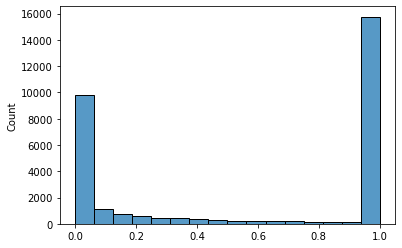

In [93]:
sns.histplot(list_of_results_cluster1_2)

In [94]:
merged_cluster1_cluster2_0['combined_pval'] = list_of_results_cluster1_2
merged_cluster1_cluster2_0

,fea3_pval,fea3_log2FC,fea3_pvaladj,bif3_pval,bif3_log2FC,bif3_pvaladj,combined_pval
AC148152.3_FG005,1.000000,0.000000,1.0,1.000000e+00,0.000000,1.00000,1.000000e+00
AC148152.3_FG006,1.000000,-0.000820,1.0,1.000000e+00,0.000000,1.00000,1.000000e+00
AC148152.3_FG008,0.212884,-0.002777,1.0,2.105598e-01,-0.001916,1.00000,1.840054e-01
AC148167.6_FG001,0.192193,-0.022065,1.0,9.900000e-10,-0.262533,0.00003,4.449037e-09
AC149475.2_FG002,0.007212,-0.003848,1.0,5.120390e-01,-0.002419,1.00000,2.437698e-02
...,...,...,...,...,...,...,...
zma-MIR167g,1.000000,-0.000039,1.0,1.000000e+00,0.000000,1.00000,1.000000e+00
zma-MIR319a,1.000000,0.000000,1.0,1.000000e+00,0.000000,1.00000,1.000000e+00
zma-MIR319c,1.000000,0.000000,1.0,1.000000e+00,0.000000,1.00000,1.000000e+00
zma-MIR390a,1.000000,0.000000,1.0,1.000000e+00,0.000000,1.00000,1.000000e+00


In [98]:
reject, corrected_pvals_cluster1_2,alphasidak,alphacbof = statsmodels.stats.multitest.multipletests(pvals = merged_cluster1_cluster2_0['combined_pval'], alpha = .05, method = 'bonferroni',)

<AxesSubplot:ylabel='Count'>

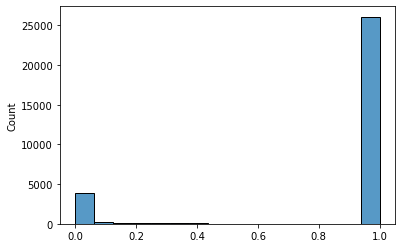

In [99]:
sns.histplot(corrected_pvals_cluster1_2)

In [100]:
merged_cluster1_cluster2_0['bonf_adj_combined_pval'] = corrected_pvals_cluster1_2
merged_cluster1_cluster2_0

,fea3_pval,fea3_log2FC,fea3_pvaladj,bif3_pval,bif3_log2FC,bif3_pvaladj,combined_pval,bonf_adj_combined_pval
AC148152.3_FG005,1.000000,0.000000,1.0,1.000000e+00,0.000000,1.00000,1.000000e+00,1.000000
AC148152.3_FG006,1.000000,-0.000820,1.0,1.000000e+00,0.000000,1.00000,1.000000e+00,1.000000
AC148152.3_FG008,0.212884,-0.002777,1.0,2.105598e-01,-0.001916,1.00000,1.840054e-01,1.000000
AC148167.6_FG001,0.192193,-0.022065,1.0,9.900000e-10,-0.262533,0.00003,4.449037e-09,0.000137
AC149475.2_FG002,0.007212,-0.003848,1.0,5.120390e-01,-0.002419,1.00000,2.437698e-02,1.000000
...,...,...,...,...,...,...,...,...
zma-MIR167g,1.000000,-0.000039,1.0,1.000000e+00,0.000000,1.00000,1.000000e+00,1.000000
zma-MIR319a,1.000000,0.000000,1.0,1.000000e+00,0.000000,1.00000,1.000000e+00,1.000000
zma-MIR319c,1.000000,0.000000,1.0,1.000000e+00,0.000000,1.00000,1.000000e+00,1.000000
zma-MIR390a,1.000000,0.000000,1.0,1.000000e+00,0.000000,1.00000,1.000000e+00,1.000000


In [105]:
merged_cluster1_cluster2_0.loc[merged_cluster1_cluster2_0.index.isin(['GRMZM2G051842','GRMZM2G171400'])]

,fea3_pval,fea3_log2FC,fea3_pvaladj,bif3_pval,bif3_log2FC,bif3_pvaladj,combined_pval,bonf_adj_combined_pval
GRMZM2G051842,0.025756,0.073730,1.000000e+00,0.000002,0.297314,0.053911,8.292417e-07,0.025507
GRMZM2G171400,1.000000,0.399588,1.650000e-45,1.000000,-0.242855,1.000000,1.000000e+00,1.000000


In [106]:
merged_cluster9_cluster10.loc[merged_cluster9_cluster10.index.isin(['GRMZM2G051842','GRMZM2G171400'])]

,fea3_pval,fea3_log2FC,fea3_pvaladj,bif3_pval,bif3_log2FC,bif3_pvaladj,combined_pval,bonf_adj_combined_pval
GRMZM2G051842,5.600000e-06,0.272383,1.686821e-01,7.830000e-13,0.537063,2.350000e-08,1.796382e-16,5.525671e-12
GRMZM2G171400,2.830000e-22,0.245489,8.510000e-18,7.800000e-05,0.158369,1.000000e+00,1.326104e-24,4.079097e-20


In [101]:
merged_cluster1_cluster2_0.loc['GRMZM2G171400']

fea3_pval                 1.000000e+00
fea3_log2FC               3.995875e-01
fea3_pvaladj              1.650000e-45
bif3_pval                 1.000000e+00
bif3_log2FC              -2.428555e-01
bif3_pvaladj              1.000000e+00
combined_pval             1.000000e+00
bonf_adj_combined_pval    1.000000e+00
Name: GRMZM2G171400, dtype: float64

In [104]:
merged_cluster1_cluster2_0.to_csv('/data/passala/Collaborator_Data/Maize_arabi_Jack_Collab/combining_pvalue/merged_SPM_cluster1_cluster2_0_fea3_bif3.csv')
merged_cluster9_cluster10.to_csv('/data/passala/Collaborator_Data/Maize_arabi_Jack_Collab/combining_pvalue/merged_IM_cluster9_cluster10_fea3_bif3.csv')